Objective: Compare how the number of strikes changes each year for the same months.

In [4]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
file_path = "../data/raw/NOAA_lightning_strikes_2009_to_2018.csv"
df = pd.read_csv(file_path)

In [9]:
df['date']=pd.to_datetime(df['date'])

In [11]:
df['month'] = df['date'].dt.month


In [13]:
df['year'] = df['date'].dt.year


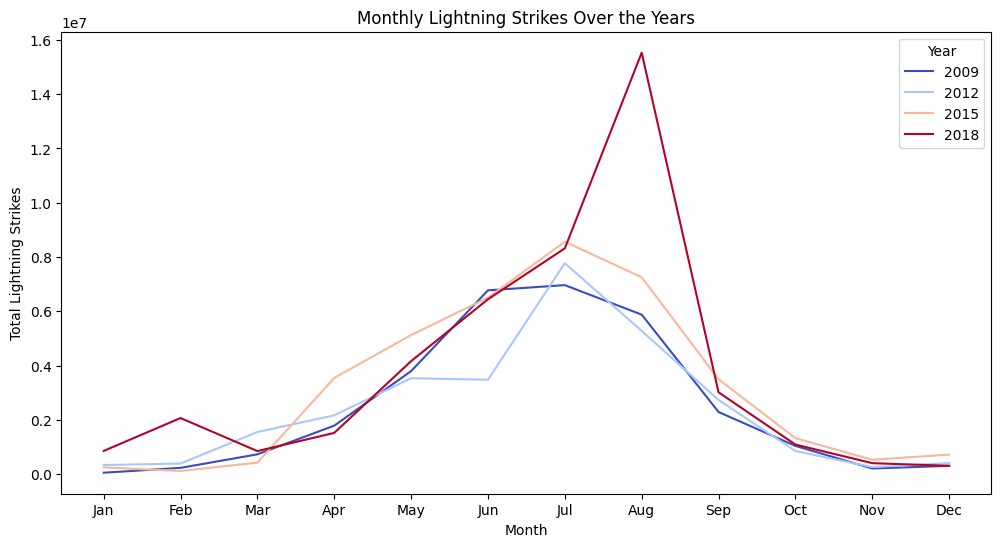

In [14]:
 # Create a new DataFrame grouping by year and month
df_by_year_month = df.groupby(['year', 'month'])['number_of_strikes'].sum().reset_index()

# Plot a line chart showing monthly trends over the years
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_by_year_month, x='month', y='number_of_strikes', hue='year', palette='coolwarm')

# Labels and Title
plt.xlabel('Month')
plt.ylabel('Total Lightning Strikes')
plt.title('Monthly Lightning Strikes Over the Years')

plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Year')
plt.show()


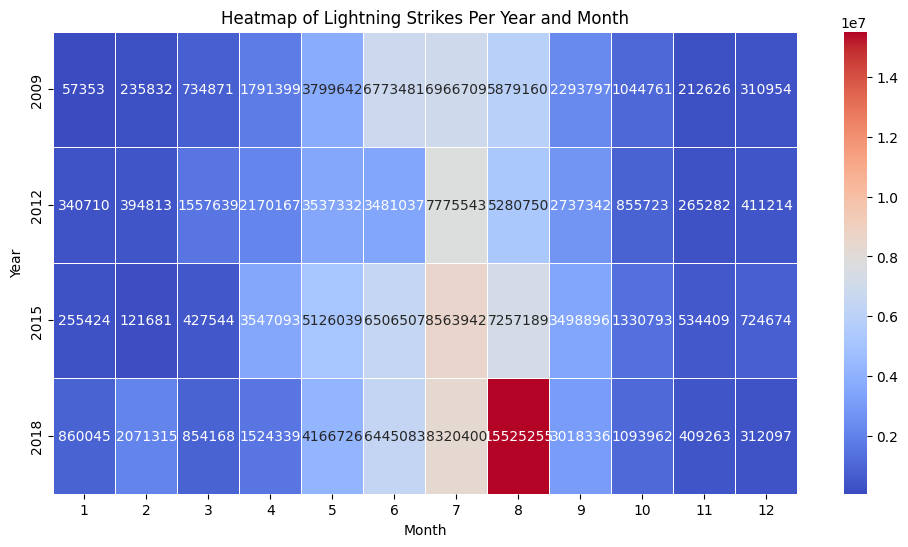

In [15]:
# Pivot the data for heatmap
df_pivot = df_by_year_month.pivot(index='year', columns='month', values='number_of_strikes')

# Plot the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(df_pivot, cmap='coolwarm', annot=True, fmt=".0f", linewidths=0.5)

# Labels and Title
plt.xlabel('Month')
plt.ylabel('Year')
plt.title('Heatmap of Lightning Strikes Per Year and Month')
plt.show()


✅ A. Detecting Anomalies & Outliers
📌 Objective: Identify unusual lightning strike events.

In [16]:
 
# Calculate IQR (Interquartile Range)
Q1 = df['number_of_strikes'].quantile(0.25)
Q3 = df['number_of_strikes'].quantile(0.75)
IQR = Q3 - Q1

# Define Outlier Range
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
outliers = df[(df['number_of_strikes'] < lower_bound) | (df['number_of_strikes'] > upper_bound)]

# Display outliers
print(outliers)


               date  number_of_strikes  x_coord  y_coord  month  year
28675    2012-01-07                 26    -90.1     34.4      1  2012
28676    2012-01-07                 30    -87.3     34.1      1  2012
28677    2012-01-07                 56    -86.1     33.9      1  2012
28678    2012-01-07                 30    -87.9     34.2      1  2012
28679    2012-01-07                 26    -87.7     34.2      1  2012
...             ...                ...      ...      ...    ...   ...
12814278 2018-12-03                 30    -75.3     32.3     12  2018
12814279 2018-12-03                 30    -75.8     31.3     12  2018
12814280 2018-12-09                 30    -85.2     26.8     12  2018
12814281 2018-12-27                 30    -96.4     31.2     12  2018
12814282 2018-12-27                 30    -96.3     31.7     12  2018

[1441626 rows x 6 columns]


 B. Correlation Between Strikes and Other Features
📌 Objective: Identify relationships between different columns.

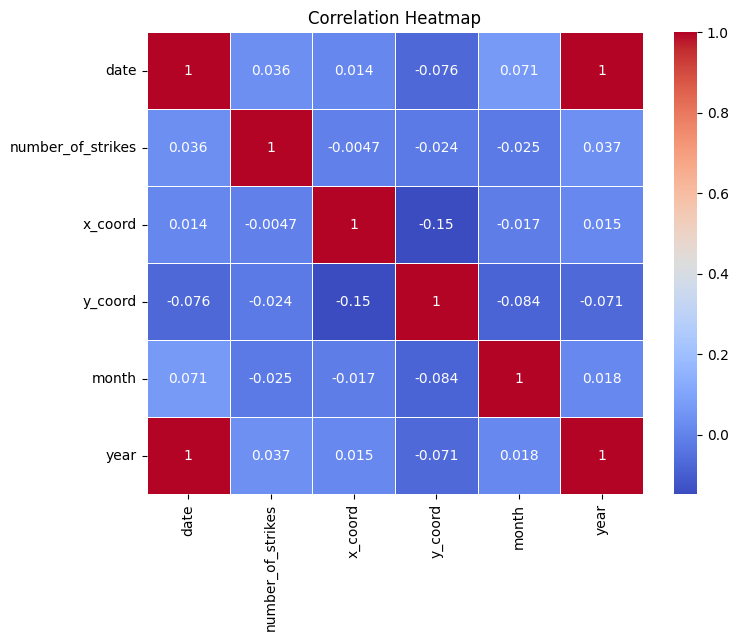

In [17]:
# Compute correlation matrix
correlation_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# Labels and Title
plt.title("Correlation Heatmap")
plt.show()
